In [1]:
import networkx as nx
%matplotlib inline
import numpy as np

# Tutorial 3

This tutorial is based on a tutorial shared on https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience.

Contents:

1. Paths
2. Connected components
3. Directed paths & components
4. Dataset: US air traffic network

# 1. Paths

Let's start with a very simple, undirected network.

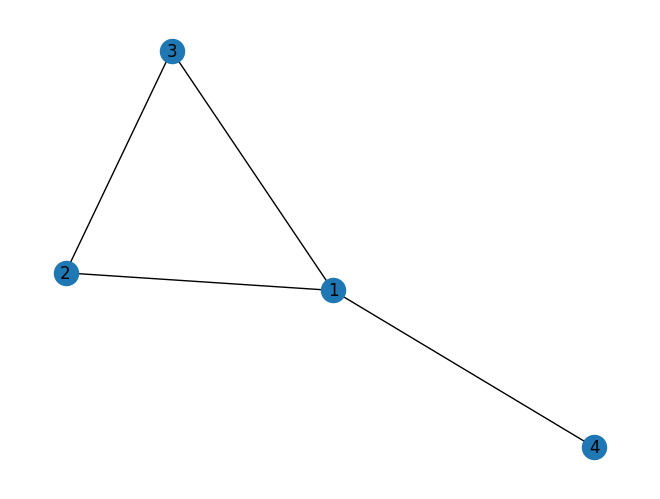

In [2]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4])

G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])

nx.draw(G, with_labels=True)

In Networkx, a *path* is a sequence of edges connecting two nodes (in the lecture we called it a *walk*). In this simple example, we can easily see that there is indeed at least one path that connects nodes 3 and 4. We can verify this with NetworkX:

In [3]:
nx.has_path(G, 3, 4)

True

There can be more than one path between two nodes. Again considering nodes 3 and 4, there are two such "simple" paths:

In [4]:
list(nx.all_simple_paths(G, 3, 4))

[[3, 2, 1, 4], [3, 1, 4]]

A simple path is one without any cycles (in the lecture we called this a *path*). If we allowed cycles, there would be infinitely many paths because one could always just go around the cycle as many times as desired.

We are often most interested in *shortest* paths. In an unweighted network, the shortest path is the one with the fewest edges. We can see that of the two simple paths between nodes 3 and 4, one is shorter than the other. We can get this shortest path with a single NetworkX function:

In [5]:
nx.shortest_path(G, 3, 4)

[3, 1, 4]

If you only care about the path length, there's a function for that too:

In [6]:
nx.shortest_path_length(G, 3, 4)

2

Note that a path length is defined here by the number of *edges* in the path, not the number of nodes, which implies

    nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1
    
for nodes $u$ and $v$.

## 2. Connected components

In the simple network above, we can see that for *every* pair of nodes, we can find a path connecting them. This is the definition of a *connected* graph. We can check this property for a given graph:

In [7]:
nx.is_connected(G)

True

Not every graph is connected:

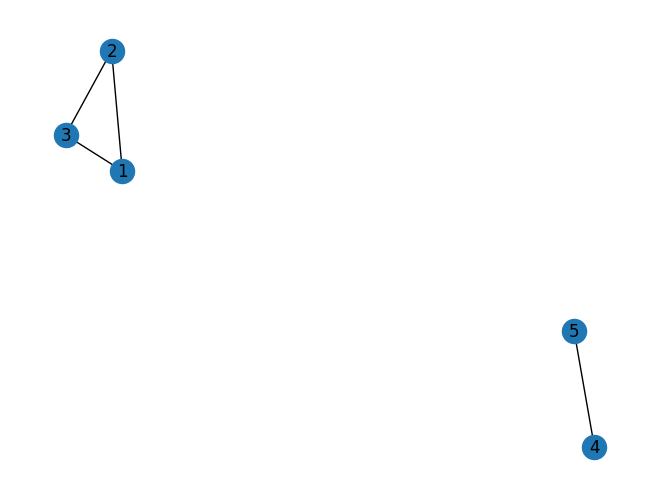

In [8]:
G = nx.Graph()

nx.add_cycle(G, (1,2,3))
G.add_edge(4,5)

nx.draw(G, with_labels=True)

In [9]:
nx.is_connected(G)

False

And NetworkX will raise an error if you ask for a path between nodes where none exists:

In [10]:
nx.has_path(G, 3, 5)

False

In [38]:
nx.shortest_path(G, 3, 5)

NodeNotFound: Either source 3 or target 5 is not in G

Visually, we can identify two connected components in our graph. Let's verify this:

In [39]:
nx.number_connected_components(G)

3

The `nx.connected_components()` function takes a graph and returns a list of sets of node names, one such set for each connected component. Verify that the two sets in the following list correspond to the two connected components in the drawing of the graph above:

In [13]:
list(nx.connected_components(G))

[{1, 2, 3}, {4, 5}]

In case you're not familiar with Python sets, they are collections of items without duplicates. These are useful for collecting node names because node names should be unique. As with other collections, we can get the number of items in a set with the `len` function:

In [14]:
components = list(nx.connected_components(G))
len(components[0])

3

We often care about the largest connected component, which is sometimes referred to as the *core* of the network. We can make use of Python's builtin `max` function in order to obtain the largest connected component. By default, Python's `max` function sorts things in lexicographic (i.e. alphabetical) order, which is not helpful here. We want the maximum connected component when sorted in order of their sizes, so we pass `len` as a key function:

In [15]:
max(nx.connected_components(G), key=len)

{1, 2, 3}

While it's often enough to just have the list of node names, sometimes we need the actual subgraph consisting of the largest connected component. One way to get this is to pass the list of node names to the `G.subgraph()` function:

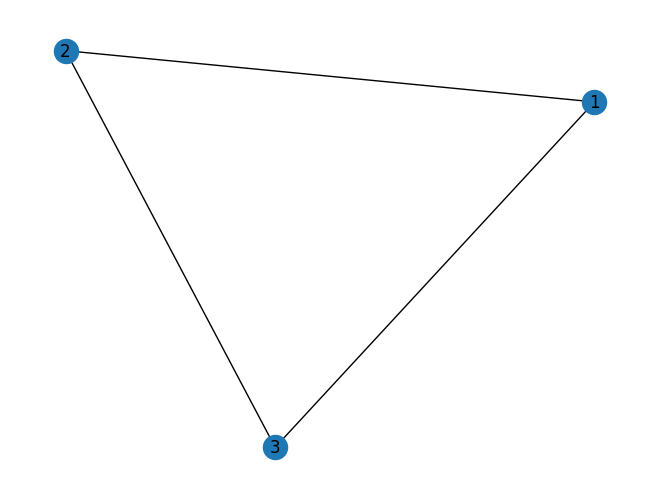

In [16]:
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)

nx.draw(core, with_labels=True)

Those of you using tab-completion will also notice a `nx.connected_component_subgraphs()` function. This can also be used to get the core subgraph but the method shown is more efficient when you only care about the largest connected component.

# 3. Directed paths & components

Let's extend these ideas about paths and connected components to directed graphs.

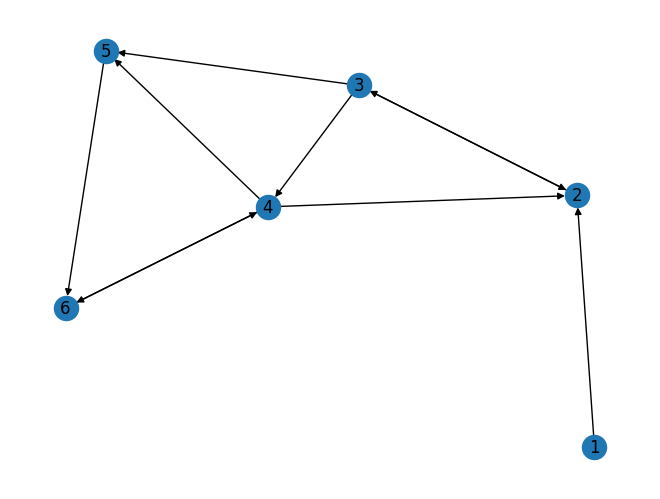

In [17]:
D = nx.DiGraph()
D.add_edges_from([
    (1,2),
    (2,3),
    (3,2), (3,4), (3,5),
    (4,2), (4,5), (4,6),
    (5,6),
    (6,4),
])
nx.draw(D, with_labels=True)

### Directed paths

We know that in a directed graph, an edge from an arbitrary node $u$ to an arbitrary node $v$ does not imply that an edge exists from $v$ to $u$. Since paths must follow edge direction in directed graphs, the same asymmetry applies for paths. Observe that this graph has a path from 1 to 4, but not in the reverse direction.

In [18]:
nx.has_path(D, 1, 4)

True

In [19]:
nx.has_path(D, 4, 1)

False

The other NetworkX functions dealing with paths take this asymmetry into account as well:

In [20]:
nx.shortest_path(D, 2, 5)

[2, 3, 5]

In [21]:
nx.shortest_path(D, 5, 2)

[5, 6, 4, 2]

Since there is no edge from 5 to 3, the shortest path from 5 to 2 cannot simply backtrack the shortest path from 2 to 5 -- it has to go a longer route through nodes 6 and 4.

### Directed components

Directed networks have two kinds of connectivity. *Strongly connected* means that there exists a directed path between every pair of nodes, i.e., that from any node we can get to any other node while following edge directionality. Think of cars on a network of one-way streets: they can't drive against the flow of traffic.

In [22]:
nx.is_strongly_connected(D)

False

*Weakly connected* means that there exist a path between every pair of nodes, regardless of direction. Think about pedestrians on a network of one-way streets: they walk on the sidewalks so they don't care about the direction of traffic.

In [23]:
nx.is_weakly_connected(D)

True

If a network is strongly connected, it is also weakly connected. The converse is not always true, as seen in this example.

The `is_connected` function for undirected graphs will raise an error when given a directed graph.

In [24]:
# This will raise an error
nx.is_connected(D)

NetworkXNotImplemented: not implemented for directed type

In the directed case, instead of `nx.connected_components` we now have `nx.weakly_connected_components` and `nx.strongly_connected_components`:

In [25]:
list(nx.weakly_connected_components(D))

[{1, 2, 3, 4, 5, 6}]

In [26]:
list(nx.strongly_connected_components(D))

[{2, 3, 4, 5, 6}, {1}]

## 4. Dataset: US air traffic network

This repository contains several example network datasets. Among these is a network of US air travel routes:

In [27]:
G = nx.read_graphml('./datasets/openflights/openflights_usa.graphml.gz')

The nodes in this graph are airports, represented by their [IATA codes](https://en.wikipedia.org/wiki/List_of_airports_by_IATA_code:_A); two nodes are connected with an edge if there is a scheduled flight directly connecting these two airports. We'll assume this graph to be undirected since a flight in one direction usually means there is a return flight.

Thus this graph has edges
```
[('HOM', 'ANC'), ('BGM', 'PHL'), ('BGM', 'IAD'), ...]
```
where ANC is Anchorage, IAD is Washington Dulles, etc.

These nodes also have **attributes** associated with them, containing additional information about the airports:

In [28]:
G.nodes['IND']

{'name': 'Indianapolis International Airport',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'IATA': 'IND'}

Node attributes are stored as a dictionary, so the values can be accessed individually as such:

In [29]:
G.nodes['IND']['name']

'Indianapolis International Airport'

Now, let's see now how big the network is

In [30]:
first_airport = list(G.nodes())[0]
print(G.nodes[first_airport])

print(list(G.neighbors(first_airport)))

{'name': 'Redding Municipal Airport', 'latitude': 40.50899887, 'longitude': -122.2929993, 'IATA': 'RDD'}
['SFO']


We want to explore how well connected a certain node is. Let's look for example at the first airport listed in the network.

In [31]:
first_airport = list(G.nodes())[0]
print(G.nodes[first_airport])

print(list(G.neighbors(first_airport)))

{'name': 'Redding Municipal Airport', 'latitude': 40.50899887, 'longitude': -122.2929993, 'IATA': 'RDD'}
['SFO']


So, the first listed airport is the Redding Municipal Airport ('RDD'), and it is directly connected only to 'SFO'. One can see that 'RDD' has only one neighbour by counting how many non-zero elements are present on the first row of adjacency matrix of the network (remember that for Pyhton objects, indexes starts from 0).

In [32]:
G_matrix = nx.to_numpy_matrix(G)
print(np.count_nonzero(G_matrix[0,:]))

1


If we look at direct flights 'RDD' is quite isolated, but if we look at the first row of i-th power of the adjacency matrix, we can find how many airports are conncected to 'RDD' by walks of length i! Let's see this for walks with length ranging from 1 to 5.

In [33]:
power_G = G_matrix.copy()
for i in range(5):
    i_walks_node0 = power_G[0,:]

    print(f'Number of neighbors reachable by a walk of length {i+1}:', np.count_nonzero(i_walks_node0))
    print(f'Total number of walks of length {i+1} starting on node 0:', int(i_walks_node0.sum()))
    
    power_G = power_G @ G_matrix # matrix multiplication

Number of neighbors reachable by a walk of length 1: 1
Total number of walks of length 1 starting on node 0: 1
Number of neighbors reachable by a walk of length 2: 71
Total number of walks of length 2 starting on node 0: 71
Number of neighbors reachable by a walk of length 3: 386
Total number of walks of length 3 starting on node 0: 3142
Number of neighbors reachable by a walk of length 4: 462
Total number of walks of length 4 starting on node 0: 146934
Number of neighbors reachable by a walk of length 5: 534
Total number of walks of length 5 starting on node 0: 6847555


So, out of the 546 airports (including 'RDD'), one can reach 534 of these with exactly 5 flights. We also see that the total number of walks grows extremely rapidly. This is because walks can have cycles.

Let's close this little investigation by looking at how many walks of length ranging from 1 to 5 there are between 'RDD' and its neighbour 'SFO'.

In [34]:
index_SFO = np.nonzero(G_matrix[0]) #We know that 'SFO' its the only neighbour of 'RDD'

power_G = G_matrix.copy()
for i in range(1,6):
    print(power_G[0][index_SFO])
    power_G = power_G @ G_matrix # matrix multiplication

[[1.]]
[[0.]]
[[71.]]
[[1694.]]
[[82236.]]


# EXERCISE 1

Is there a direct flight between Indianapolis and Fairbanks, Alaska (FAI)? A direct flight is one with no intermediate stops.

In [43]:
nx.shortest_path(G, 'IND', 'FAI')

['IND', 'BOS', 'SEA', 'FAI']

The shortest path has two intermediate nodes, thus there exists no direct flight.

# EXERCISE 2

If I wanted to fly from Indianapolis to Fairbanks, Alaska what would be an itinerary with the fewest number of flights?

As seen in ex1 the fewest number of flights are 3, since between the four nodes are 3 edges.

# EXERCISE 3
By default, NetworkX uses the Dijkstra algorithm to compute shortest paths (you can check the source code [here](https://networkx.org/documentation/stable/_modules/networkx/algorithms/shortest_paths/generic.html#shortest_path)).
Below, you will find an implementation of the Dijkstra algorithm (taken from [here](https://gist.github.com/aeged/db5bfda411903ecd89a3ba3cb7791a05)) using a NetworkX graph and a Python [PriorityQueue](https://docs.python.org/3/library/queue.html).

Carefully read it and identify the algorithm's steps given in the lecture's slides.

In [44]:
# dependencies for our dijkstra's implementation
from queue import PriorityQueue
from math import inf
# graph dependency  
import networkx as nx


"""Dijkstra's shortest path algorithm"""
def dijkstra(graph: 'networkx.classes.graph.Graph', start: str, end: str) -> 'List':
    """Get the shortest path of nodes by going backwards through prev list
    credits: https://github.com/blkrt/dijkstra-python/blob/3dfeaa789e013567cd1d55c9a4db659309dea7a5/dijkstra.py#L5-L10"""
    def backtrace(prev, start, end):
        node = end
        path = []
        while node != start:
            path.append(node)
            node = prev[node]
        path.append(node) 
        path.reverse()
        return path
        
    """get the cost of edges from node -> node"""
    def cost(u, v):
        return 1 # here we consider each edge with a unit length.
        
    """main algorithm"""
    # predecessor of current node on shortest path 
    prev = {} 
    # initialize distances from start -> given node i.e. dist[node] = dist(start, node)
    dist = {v: inf for v in list(nx.nodes(graph))} 
    # nodes we've visited
    visited = set() 
    # prioritize nodes from start -> node with the shortest distance!
    ## elements stored as tuples (distance, node) 
    pq = PriorityQueue()  
    
    dist[start] = 0  # dist from start -> start is zero
    pq.put((dist[start], start))
    
    while 0 != pq.qsize():
        curr_cost, curr = pq.get()
        visited.add(curr)
        #print(f'visiting {curr}')
        # look at curr's adjacent nodes
        for neighbor in dict(graph.adjacency()).get(curr):
            # if we found a shorter path 
            path = dist[curr] + cost(curr, neighbor)
            if path < dist[neighbor]:
                # update the distance, we found a shorter one!
                dist[neighbor] = path
                # update the previous node to be prev on new shortest path
                prev[neighbor] = curr
                # if we haven't visited the neighbor
                if neighbor not in visited:
                    # insert into priority queue and mark as visited
                    visited.add(neighbor)
                    pq.put((dist[neighbor],neighbor))
                # otherwise update the entry in the priority queue
                else:
                    # remove old
                    _ = pq.get((dist[neighbor],neighbor))
                    # insert new
                    pq.put((dist[neighbor],neighbor))
    print("=== Dijkstra's Algo Output ===")
    #print("Distances")
    #print(dist)
    #print("Visited")
    #print(visited)
    #print("Previous")
    #print(prev)
    # we are done after every possible path has been checked 
    return backtrace(prev, start, end), dist[end]

Use this newly defined dijkstra function to compute the distance between 'IND' and 'FAI'.

In [45]:
dijkstra(G,'IND','FAI')

=== Dijkstra's Algo Output ===


(['IND', 'DEN', 'ANC', 'FAI'], 3)

You might find a different shortest path from the one found before (but with the same length). Indeed, by printing all the shortest paths between the two nodes we can see that, in this case, the shortest path is not unique.

In [37]:
print([p for p in nx.all_shortest_paths(G, 'IND', 'FAI')])

[['IND', 'BOS', 'SEA', 'FAI'], ['IND', 'MCI', 'SEA', 'FAI'], ['IND', 'PHX', 'SEA', 'FAI'], ['IND', 'SFO', 'SEA', 'FAI'], ['IND', 'LAX', 'SEA', 'FAI'], ['IND', 'EWR', 'SEA', 'FAI'], ['IND', 'DCA', 'SEA', 'FAI'], ['IND', 'FLL', 'SEA', 'FAI'], ['IND', 'SLC', 'SEA', 'FAI'], ['IND', 'IAH', 'SEA', 'FAI'], ['IND', 'MIA', 'SEA', 'FAI'], ['IND', 'IAD', 'SEA', 'FAI'], ['IND', 'BWI', 'SEA', 'FAI'], ['IND', 'MSP', 'SEA', 'FAI'], ['IND', 'JFK', 'SEA', 'FAI'], ['IND', 'DFW', 'SEA', 'FAI'], ['IND', 'LAS', 'SEA', 'FAI'], ['IND', 'ATL', 'SEA', 'FAI'], ['IND', 'CLT', 'SEA', 'FAI'], ['IND', 'MCO', 'SEA', 'FAI'], ['IND', 'DEN', 'SEA', 'FAI'], ['IND', 'PHL', 'SEA', 'FAI'], ['IND', 'ORD', 'SEA', 'FAI'], ['IND', 'DTW', 'SEA', 'FAI'], ['IND', 'TPA', 'SEA', 'FAI'], ['IND', 'PHX', 'ANC', 'FAI'], ['IND', 'LAX', 'ANC', 'FAI'], ['IND', 'SLC', 'ANC', 'FAI'], ['IND', 'MSP', 'ANC', 'FAI'], ['IND', 'LAS', 'ANC', 'FAI'], ['IND', 'DEN', 'ANC', 'FAI'], ['IND', 'ORD', 'ANC', 'FAI']]


# EXERCISE 4

Is it possible to travel from any airport in the US to any other airport in the US, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?

In [47]:
nx.is_connected(G)

False

the network is not connected thus the answer is no.

Finally, open the US flight dataset with [Gephi](https://gephi.org/). You can run gephi by entering the command `gephi` in a terminal of the IMATH servers (from a thinlinc client), or you can install it on your computer.

Try different layouts and visualizations, for example the "Geo Layout" allows you to use plot the network following the geographical locations of each airport (you might have to install the GeoLayout plugin in Tool > Plugins). You can also detect the connected components in the "Statistics" panel and display them with different colors in the "Appearance" panel (Nodes > Partition> Component ID).